# Laboratorio 4 - Aprendizaje profundo para la clasificación de imágenes


Siga las instrucciones en negritas para completar el laboratorio.

------------

## El reto

**Su tarea es la de construir un clasificador de imágenes usando Keras (Tensorflow) y Redes Neuronales Convolucionales (CNN) para un conjunto de datos conocido como "Fashion MNIST dataset""
. Este conjunto de datos incluye 10 etiquetas de diferentes tipos de ropa con imágenes de 28 by 28 *escalagris*. Hay un conjunto de datos de entrenamiento de 60,000 imágenes y un conjunto de datos de prueba de 10,000 imágenes.**

    Etiqueta	Descripción
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Los datos

**Tarea 1: Ejecute el siguiente código para descargar los datos usando Keras.**

In [138]:
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

(X_entreno, y_entreno), (X_prueba, y_prueba) = keras.datasets.fashion_mnist.load_data()

## Visualización de los Datos

**TAREA 2: Utilice matplotlib para visualizar una imagen del conjunto de datos.  Puede ser cualquier imagen del conjunto de datos.**

In [139]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

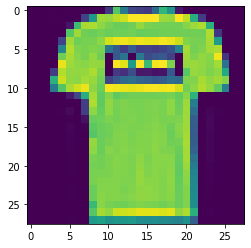

In [140]:
plt.imshow(X_entreno[1])

## Preprocesamiento de los Datos

**TAREA 3: Normalice los datos X entreno y X prueba dividiendo por el valor máximo de los arreglos de las imágenes.**

In [141]:
X_entreno = X_entreno / 255
X_prueba = X_prueba / 255

**TAREA 4: Cambie el formato de los arreglos X para que incluyan una 4rta dimensión del canal de color. Similar a lo que se hizo en clase para el conjunto de datos MNIST de números.**

In [142]:
X_entreno = X_entreno.reshape(X_entreno.shape[0], 28, 28,1)

In [143]:
X_prueba = X_prueba.reshape(X_prueba.shape[0], 28, 28,1)

**TAREA 5: Convierta los valores de y_entreno y y_prueba para que estén "one-hot encoded" para poder hacer un análisis categórico con Keras.**

In [144]:
y_cat_prueba = keras.utils.to_categorical(y_prueba, 10)

In [145]:
y_entreno = keras.utils.to_categorical(y_entreno, 10)

In [146]:
y_cat_prueba.shape

(10000, 10)

In [147]:
y_entreno.shape

(60000, 10)

## Configuración del Modelo

**TAREA 6: Utilice Keras para crear un modelo que contenga, al menos, las siguientes capas (pero siéntase en libertad de experimentar):**

* Capa "2D Convolutional", filtros = 32 y tamaño_kernel = (4, 4)
* Capa de "Pooling""
 de tamaño = (2, 2)

* Capa de Aplanado
* Capa Densa (128 unidades, pero siéntase en libertad de "jugar"con este valor), activación RELU

* Una capa Final Densa de 10 unidades con activación softmax

**Luego compile el modelo con estos parámetros: loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']**

In [148]:
X_entreno[0].shape

(28, 28, 1)

In [149]:
modelo = keras.models.Sequential()

modelo.add(keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu',))
modelo.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

modelo.add(keras.layers.Flatten())


modelo.add(keras.layers.Dense(128))
modelo.add(keras.layers.Activation('relu'))
""" 
# Dropouts ayudan a reducir el sobre ajuste al ir "apagando" unidades al azar durante el entrenamiento.
# Aquí estamos indicando que al azar apague el 50% de las unidades.
modelo.add(keras.layers.Dropout(0.5)) """

# La última capa, recordamos que es binaria por lo que selecionamos sigmoid
modelo.add(keras.layers.Dense(10))
modelo.add(keras.layers.Activation('softmax'))

modelo.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### Entrenamiento del Modelo
**TAREA 6: Entrene/Ajuste el modelo con el conjunto X_entreno set. La cantidad de épocas le queda a Ud determinar.**

In [150]:
resultados = modelo.fit(X_entreno, y_entreno,epochs = 5,
                                  validation_data = (X_prueba, y_cat_prueba))

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3989 - accuracy: 0.8583 - val_loss: 0.3379 - val_accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2751 - accuracy: 0.9008 - val_loss: 0.2843 - val_accuracy: 0.8963
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2378 - accuracy: 0.9143 - val_loss: 0.2731 - val_accuracy: 0.9022
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2138 - accuracy: 0.9231 - val_loss: 0.2765 - val_accuracy: 0.9027
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1951 - accuracy: 0.9297 - val_loss: 0.2701 - val_accuracy: 0.9054


### Evaluación del Modelo

**TAREA 7: Muestre los valores de [accuracy, precision, recall, f1-score] que logró el modelo con el conjunto de datos X_prueba data set. Tenga en mente que hay múltiples formas de hacer esto.  Sin embargo, le recomendamos que utilice el mismo procedimiento usado mencionado en la parte de intuición, en clase.**

In [151]:
perdidas = pd.DataFrame(modelo.history.history)

In [152]:
perdidas.head()

,loss,accuracy,val_loss,val_accuracy
0,0.398928,0.858267,0.337872,0.8785
1,0.275116,0.900767,0.284308,0.8963
2,0.237765,0.914250,0.273070,0.9022
3,0.213831,0.923083,0.276530,0.9027
4,0.195126,0.929683,0.270064,0.9054


<AxesSubplot:>

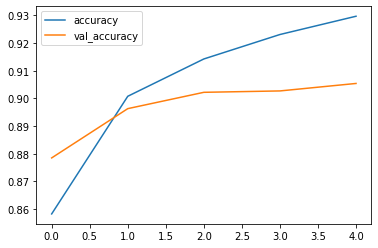

In [153]:
perdidas[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

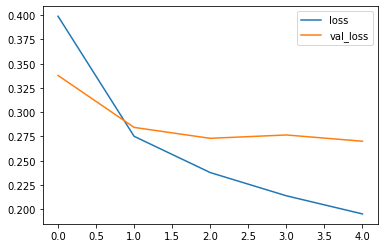

In [154]:
perdidas[['loss', 'val_loss']].plot()

In [155]:
print(modelo.metrics_names)
print(modelo.evaluate(X_prueba, y_cat_prueba, verbose = 0))

['loss', 'accuracy']
[0.2700638771057129, 0.9053999781608582]


In [156]:
test_loss, test_acc = modelo.evaluate(X_prueba,  y_cat_prueba, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2701 - accuracy: 0.9054 - 627ms/epoch - 2ms/step

Test accuracy: 0.9053999781608582


In [157]:
from sklearn.metrics import classification_report, confusion_matrix
predicciones = modelo.predict(X_prueba)
predicciones = np.argmax(predicciones, axis=1)
print(predicciones[0])
print(classification_report(y_prueba, predicciones))

313/313 [==============================] - 1s 2ms/step
9
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.91      0.92      0.92      1000
           4       0.83      0.88      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.72      0.71      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [158]:
confusion_matrix(y_prueba, predicciones)

array([[840,   0,  14,  18,   4,   2, 115,   0,   7,   0],
       [  1, 978,   0,  12,   2,   0,   5,   0,   2,   0],
       [ 13,   1, 836,   7,  82,   0,  61,   0,   0,   0],
       [  6,   4,  10, 922,  18,   0,  39,   0,   1,   0],
       [  1,   1,  43,  29, 876,   0,  50,   0,   0,   0],
       [  0,   0,   0,   1,   0, 982,   0,   6,   0,  11],
       [103,   1,  73,  23,  77,   0, 715,   0,   8,   0],
       [  0,   0,   0,   0,   0,  18,   0, 962,   2,  18],
       [  2,   1,   3,   2,   2,   3,   4,   2, 981,   0],
       [  0,   0,   0,   0,   0,   6,   0,  31,   1, 962]], dtype=int64)

# Gran trabajo!